<a href="https://colab.research.google.com/github/iamchetry/Defining-Solving-RL-Environments/blob/main/nirajche_assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Importing Libraries**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import gym
from gym import spaces
from google.colab import widgets
import time
import random
import itertools
from collections import defaultdict
from matplotlib.pyplot import *

## **Deterministic Environment**

In [ ]:
class DetEnvironment(gym.Env):
    metadata = {'render.modes': []}
    
    def __init__(self):
        self.observation_space = spaces.Discrete(16) # 4*4 Grid
        self.action_space = spaces.Discrete(4) # {Right, Left, Up, Down}
        
    def reset(self):
        # Setting Positions
        self.agent_pos = [0, 0]
        self.goal_pos = [3, 3]
        self.diamond_pos = [1, 2]
        self.monster_pos = [3, 1]
        self.candy_pos = [2, 3]

        # Setting Rewards
        self.reward = 0
        self.goal_reward = 10
        self.diamond_reward = 3
        self.monster_reward = -5
        self.candy_reward = 1

        # Setting State Values
        self.state = np.zeros((4,4))
        self.state[tuple(self.agent_pos)] = 2.5
        self.state[tuple(self.diamond_pos)] = 0.5
        self.state[tuple(self.monster_pos)] = 1
        self.state[tuple(self.candy_pos)] = 1.5
        self.state[tuple(self.goal_pos)] = 2

        observation = self.agent_pos

        return observation
    
    def step(self, action, max_timesteps, timestep):
        # Deterministic Actions
        if action == 0:
          self.agent_pos[0] += 1 # Moving Down
        if action == 1:
          self.agent_pos[0] -= 1 # Moving Up
        if action == 2:
          self.agent_pos[1] += 1 # Moving Right
        if action == 3:
          self.agent_pos[1] -= 1 # Moving Left
          
        self.agent_pos = np.clip(self.agent_pos, 0, 3) # Safty Measure - Making sure the Agent is inside the grid

        # Defining State Values
        self.state = np.zeros((4,4))
        self.state[tuple(self.agent_pos)] = 2.5
        self.state[tuple(self.diamond_pos)] = 0.5
        self.state[tuple(self.monster_pos)] = 1
        self.state[tuple(self.candy_pos)] = 1.5
        self.state[tuple(self.goal_pos)] = 2
        observation = self.agent_pos
                
        # Reward Allocation for different States 
        if (self.agent_pos == self.goal_pos).all():
          reward = self.goal_reward
        elif (self.agent_pos == self.diamond_pos).all():
          reward = self.diamond_reward
        elif (self.agent_pos == self.monster_pos).all():
          reward = self.monster_reward
        elif (self.agent_pos == self.candy_pos).all():
          reward = self.candy_reward
        else:
          reward = self.reward
                
        # Stopping Criterion
        if timestep >= max_timesteps or (self.agent_pos == self.goal_pos).all():
          done = True 
        else:
          done = False

        if (self.agent_pos == self.goal_pos).all():
          goal_reached = True
        else:
          goal_reached = False

        info = {}
        
        return observation, reward, done, goal_reached, info
        
    def render(self):
        # Displaying the State
        plt.imshow(self.state)

# **Stochastic Environment**

In [ ]:
class StocEnvironment(gym.Env):
    metadata = {'render.modes': []}
    
    def __init__(self):
        self.observation_space = spaces.Discrete(16) # 4*4 Grid
        self.action_space = spaces.Discrete(4) # {Right, Left, Up, Down}
        
    def reset(self):        
        # Setting Positions
        self.agent_pos = [3, 0]
        self.goal_pos = [0, 3]
        self.diamond_pos = [0, 0]
        self.monster_pos = [0, 2]
        self.candy_pos = [1, 2]

        # Setting Rewards
        self.reward = 0
        self.goal_reward = 10
        self.diamond_reward = 3
        self.monster_reward = -5
        self.candy_reward = 1

        # Setting State Values
        self.state = np.zeros((4,4))
        self.state[tuple(self.agent_pos)] = 2.5
        self.state[tuple(self.diamond_pos)] = 0.5
        self.state[tuple(self.monster_pos)] = 1
        self.state[tuple(self.candy_pos)] = 1.5
        self.state[tuple(self.goal_pos)] = 2

        observation = self.agent_pos

        return observation
    
    def step(self, action, max_timesteps, timestep):
        # Stochasticity Included
        if action == 0:
          act_ = random.choice(['Down', 'Same', 'Down']) # p(Down) = 0.67, p(Same) = 0.33
          if act_ == 'Down':
            self.agent_pos[0] += 1 # Moving Down

        if action == 1:
          act_ = random.choice(['Up', 'Same', 'Up']) # p(Up) = 0.67, p(Same) = 0.33
          if act_ == 'Up':
            self.agent_pos[0] -= 1 # Moving Up

        if action == 2:
          act_ = random.choice(['Right', 'Same', 'Right']) # p(Right) = 0.67, p(Same) = 0.33
          if act_ == 'Right':
            self.agent_pos[1] += 1 # Moving Right

        if action == 3:
          act_ = random.choice(['Left', 'Same', 'Left']) # p(Left) = 0.67, p(Same) = 0.33
          if act_ == 'Left':
            self.agent_pos[1] -= 1 # Moving Left
          
        self.agent_pos = np.clip(self.agent_pos, 0, 3) # Safty Measure - Making sure the Agent is inside the grid

        # Defining State Values
        self.state = np.zeros((4,4))
        self.state[tuple(self.agent_pos)] = 2.5
        self.state[tuple(self.diamond_pos)] = 0.5
        self.state[tuple(self.monster_pos)] = 1
        self.state[tuple(self.candy_pos)] = 1.5
        self.state[tuple(self.goal_pos)] = 2
        observation = self.agent_pos
        
        # Reward Allocation for different States 
        if (self.agent_pos == self.goal_pos).all():
          if act_ != 'Same': # Safety Check to avoid getting same Reward multiple time due to staying in the same State
            reward = self.goal_reward
          else:
            reward = self.reward

        elif (self.agent_pos == self.diamond_pos).all():
          if act_ != 'Same': # Safety Check to avoid getting same Reward multiple time due to staying in the same State
            reward = self.diamond_reward
          else:
            reward = self.reward

        elif (self.agent_pos == self.monster_pos).all():
          if act_ != 'Same': # Safety Check to avoid getting same Reward multiple time due to staying in the same State
            reward = self.monster_reward
          else:
            reward = self.reward

        elif (self.agent_pos == self.candy_pos).all():
          if act_ != 'Same': # Safety Check to avoid getting same Reward multiple time due to staying in the same State
            reward = self.candy_reward
          else:
            reward = self.reward

        else:
          reward = self.reward
                
        # Stopping Criterion
        if timestep >= max_timesteps or (self.agent_pos == self.goal_pos).all():
          done = True 
        else:
          done = False

        if (self.agent_pos == self.goal_pos).all():
          goal_reached = True
        else:
          goal_reached = False

        info = {}
        
        return observation, reward, done, goal_reached, info
        
    def render(self):
        # Displaying the State
        plt.imshow(self.state)

## **Random Agent**

In [ ]:
class RandomAgent:
    def __init__(self, env):
      '''
      env : Environment Object
      '''
      self.env = env
      self.observation_space = env.observation_space
      self.action_space = env.action_space
        
    def step(self, observation):
      '''
      observation : Current Observation
      '''
      return np.random.choice(self.action_space.n) # Random Selection of Action

## **Q-Learning Function**

In [ ]:
def select_policy(epsilon, number_of_actions, q_dict, state):
  '''
  This function chooses an action based on the value of greedyness
  '''
  prob_ = random.uniform(0, 1)
  if prob_ < epsilon:
    action_index = random.choice(range(number_of_actions))
  else:
    action_index = np.argmax(q_dict[str(state)])

  return action_index


def q_learning(episodes, env, epsilon, learning_rate, type_of_env=None):
  '''
  This is the function for Q-Learning
  '''
  percent_episodes_goal_reached = list() # List to store percent of episodes where goal is reached
  
  # Hyper Parameter tuning for max_timesteps and discount factor
  for max_timesteps in max_timesteps_list:
    for discount_factor in discount_factor_list:
      q_dict = defaultdict(lambda: np.zeros(env.action_space.n)) # Initializing Q values
  
      cum_reward_list = list() # List to store cumulative rewards for all episodes
      epsilon_list = list() # List to store epsilon values for all episodes
      epsilon_list.append(epsilon)
      target_epsilon = 0.1
      goal_reached_list = list() # List to store the flag value whether goal is reached or not, for all episodes
      avg_reward_list = list() # List to store average reward values for all episodes
      timesteps_list = list() # List to store timesteps values for all episodes

      for ep_ in range(episodes):
        state = env.reset() # Resetting the Env.
        timestep = 0 
        done = False

        cum_reward = 0 # Initial Value for Cumulative Reward
        goal_reach_flag = 0 # Initial value fo Goal Reached flag

        while not done:
          action = select_policy(epsilon, env.action_space.n, q_dict, state) # Choose an action
          timestep = timestep + 1
          next_state, reward, done, is_goal_reached, info = env.step(action, max_timesteps, timestep) # Perform the action -> Obtain a new state -> Get a new reward
          if is_goal_reached:
            goal_reach_flag = 1
          state = np.clip(state, 0, 3)
          next_state = np.clip(next_state, 0, 3)

          # Q-Learning updates
          loss = reward + (discount_factor*max(q_dict[str(next_state)])) - q_dict[str(state)][action]
          q_dict[str(state)][action] = q_dict[str(state)][action] + learning_rate*loss
          
          state = next_state
          cum_reward = cum_reward + reward
        
        avg_reward = cum_reward/timestep
        avg_reward_list.append(avg_reward)

        cum_reward_list.append(cum_reward)

        goal_reached_list.append(goal_reach_flag)

        epsilon = epsilon*(target_epsilon/epsilon)**(1/(episodes-1))
        epsilon_list.append(epsilon)

        timesteps_list.append(timestep)

      percent_episodes_goal_reached.append(np.mean(goal_reached_list)*100)
      
      # Plot Episodes v/s Cumulative Reward
      figure(figsize=(15, 10))
      plot(list(range(1, len(cum_reward_list)+1)), cum_reward_list, color='r')
      xlabel('Episodes')
      ylabel('Cumulative Reward')
      title('For Max Timesteps = {} & Discount Factor = {}'.format(max_timesteps, discount_factor))
      savefig('Q_Cum_Rew_{}_{}_{}.png'.format(max_timesteps, discount_factor, type_of_env))

      # Plot Episodes v/s Average Reward
      figure(figsize=(15, 10))
      plot(list(range(1, len(avg_reward_list)+1)), avg_reward_list, color='r')
      xlabel('Episodes')
      ylabel('Average Reward')
      title('For Max Timesteps = {} & Discount Factor = {}'.format(max_timesteps, discount_factor))
      savefig('Q_Avg_Rew_{}_{}_{}.png'.format(max_timesteps, discount_factor, type_of_env))

      # PLot Episodes v/s Timesteps used
      figure(figsize=(15, 10))
      plot(list(range(1, len(timesteps_list)+1)), timesteps_list, color='r')
      xlabel('Episodes')
      ylabel('Timesteps')
      title('For Max Timesteps = {} & Discount Factor = {}'.format(max_timesteps, discount_factor))
      savefig('Q_TS_{}_{}_{}.png'.format(max_timesteps, discount_factor, type_of_env))

  return cum_reward_list, epsilon_list, percent_episodes_goal_reached

## **TD(0) Function**

In [ ]:
def td_0(episodes, env, learning_rate, type_of_env=None):
  '''
  This is the function for Temporal Difference (0)
  '''
  percent_episodes_goal_reached = list() # List to store percent of episodes where goal is reached
  
  for max_timesteps in max_timesteps_list:
    for discount_factor in discount_factor_list:
      v_dict = defaultdict(lambda: 0) # Initializing State Values

      cum_reward_list = list() # List to store cumulative rewards for all episodes
      goal_reached_list = list() # List to store the flag value whether goal is reached or not, for all episodes
      avg_reward_list = list() # List to store average reward values for all episodes
      timesteps_list = list() # List to store timesteps values for all episodes

      for ep_ in range(episodes):
        state = env.reset() # Resetting the Env.
        timestep = 0
        done = False

        cum_reward = 0 # Initial Value for Cumulative Reward
        goal_reach_flag = 0 # Initial value fo Goal Reached flag

        while not done:
          action = agent.step(state) # Choose an action
          timestep = timestep + 1
          next_state, reward, done, is_goal_reached, info = env.step(action, max_timesteps, timestep) # Perform the action -> Obtain a new state -> Get a new reward
          if is_goal_reached:
            goal_reach_flag = 1
          state = np.clip(state, 0, 3)
          next_state = np.clip(next_state, 0, 3)

          # TD(0) updates
          loss = reward + (discount_factor*v_dict[str(next_state)]) - v_dict[str(state)]
          v_dict[str(state)] = v_dict[str(state)] + learning_rate*loss

          state = next_state
          cum_reward = cum_reward + reward
        
        avg_reward = cum_reward/timestep
        avg_reward_list.append(avg_reward)

        cum_reward_list.append(cum_reward)

        goal_reached_list.append(goal_reach_flag)

        timesteps_list.append(timestep)

      percent_episodes_goal_reached.append(np.mean(goal_reached_list)*100)
      
      # Plot Episodes v/s Cumulative Reward
      figure(figsize=(15, 10))
      plot(list(range(1, len(cum_reward_list)+1)), cum_reward_list, color='r')
      xlabel('Episodes')
      ylabel('Cumulative Reward')
      title('For Max Timesteps = {} & Discount Factor = {}'.format(max_timesteps, discount_factor))
      savefig('TD_Cum_Rew_{}_{}_{}.png'.format(max_timesteps, discount_factor, type_of_env))

      # Plot Episodes v/s Average Reward
      figure(figsize=(15, 10))
      plot(list(range(1, len(avg_reward_list)+1)), avg_reward_list, color='r')
      xlabel('Episodes')
      ylabel('Average Reward')
      title('For Max Timesteps = {} & Discount Factor = {}'.format(max_timesteps, discount_factor))
      savefig('TD_Avg_Rew_{}_{}_{}.png'.format(max_timesteps, discount_factor, type_of_env))

      # PLot Episodes v/s Timesteps used
      figure(figsize=(15, 10))
      plot(list(range(1, len(timesteps_list)+1)), timesteps_list, color='r')
      xlabel('Episodes')
      ylabel('Number of Timesteps')
      title('For Max Timesteps = {} & Discount Factor = {}'.format(max_timesteps, discount_factor))
      savefig('TD_TS_{}_{}_{}.png'.format(max_timesteps, discount_factor, type_of_env))

  return cum_reward_list, percent_episodes_goal_reached

## **Values taken to be tuned**

In [ ]:
max_timesteps_list = [100, 120, 150]
discount_factor_list = [0.1, 0.5, 0.9]

In [ ]:
episodes = 1000
epsilon_start = 0.9
learning_rate = 0.1

## **Q-Learning for Deterministic Env.**

In [ ]:
env = DetEnvironment() # Defining Env. Class Object
cum_rewards_q_det, epsilon_list_q_det, percent_episodes_goal_reached_q_det = q_learning(episodes, env, epsilon_start, learning_rate, type_of_env='Det')

## **TD(0) for Deterministic Env.**

In [ ]:
env = DetEnvironment() # Defining Env. Class Object
agent = RandomAgent(env) # Defining Random Agent Class Object
cum_rewards_td_det, percent_episodes_goal_reached_td_det = td_0(episodes, env, learning_rate, type_of_env='Det')

## **Q-Learning for Stochastic Env.**

In [ ]:
env = StocEnvironment() # Defining Env. Class Object
cum_rewards_q_stoc, epsilon_list_q_stoc, percent_episodes_goal_reached_q_stoc = q_learning(episodes, env, epsilon_start, learning_rate, type_of_env='Stoc')

## **TD(0) for Stochastic Env.**

In [ ]:
env = StocEnvironment() # Defining Env. Class Object
agent = RandomAgent(env) # Defining Random Agent Class Object
cum_rewards_td_stoc, percent_episodes_goal_reached_td_stoc = td_0(episodes, env, learning_rate, type_of_env='Stoc')

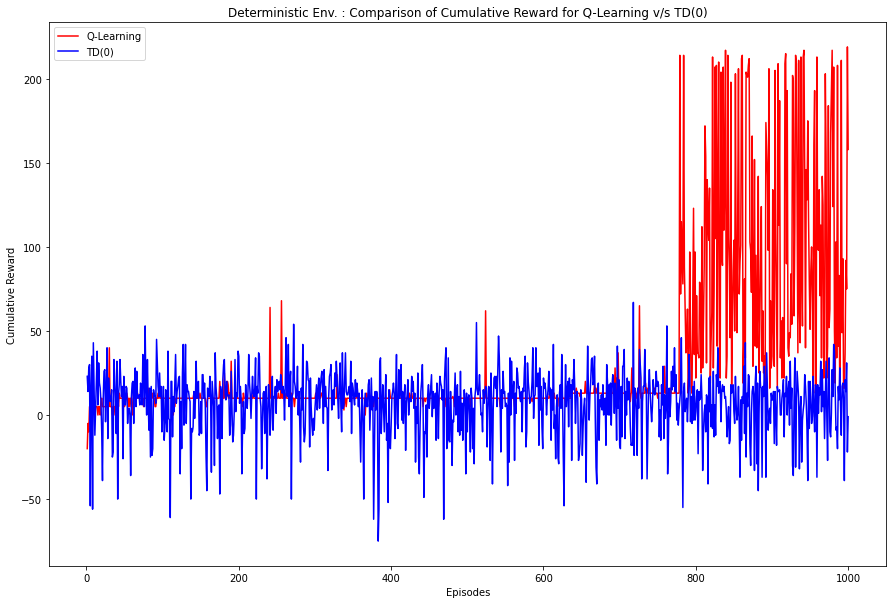

In [ ]:
# Reward Comparison
figure(figsize=(15, 10))
plot(list(range(1, len(cum_rewards_q_det)+1)), cum_rewards_q_det, color='r', label='Q-Learning')
plot(list(range(1, len(cum_rewards_td_det)+1)), cum_rewards_td_det, color='b', label='TD(0)')
xlabel('Episodes')
ylabel('Cumulative Reward')
title('Deterministic Env. : Comparison of Cumulative Reward for Q-Learning v/s TD(0)')
legend(loc='upper left')
savefig('Det_compare.png')

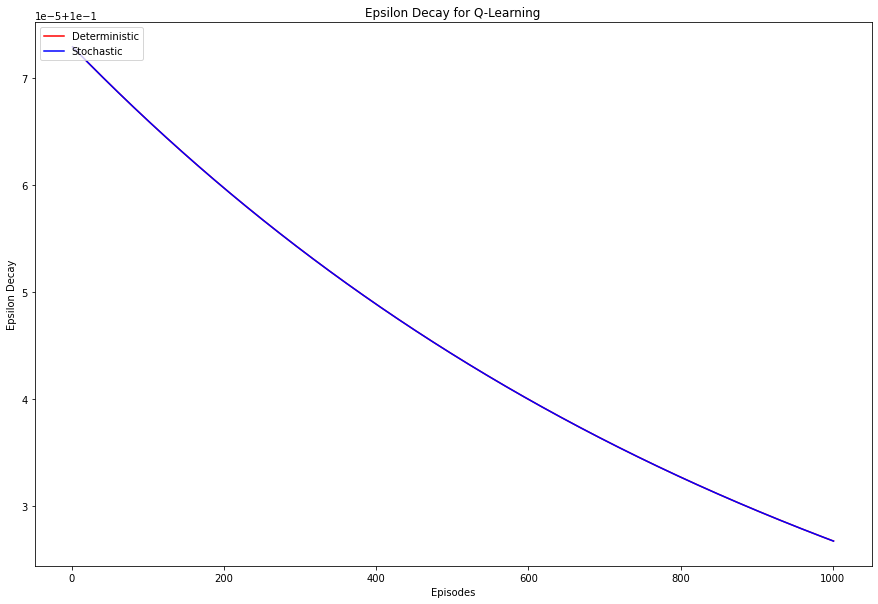

In [ ]:
# Epsilon Decay
figure(figsize=(15, 10))
plot(list(range(1, len(epsilon_list_q_det)+1)), epsilon_list_q_det, color='r', label='Deterministic')
plot(list(range(1, len(epsilon_list_q_stoc)+1)), epsilon_list_q_stoc, color='b', label='Stochastic')
xlabel('Episodes')
ylabel('Epsilon Decay')
title('Epsilon Decay for Q-Learning')
legend(loc='upper left')
savefig('epsilon_decay.png')

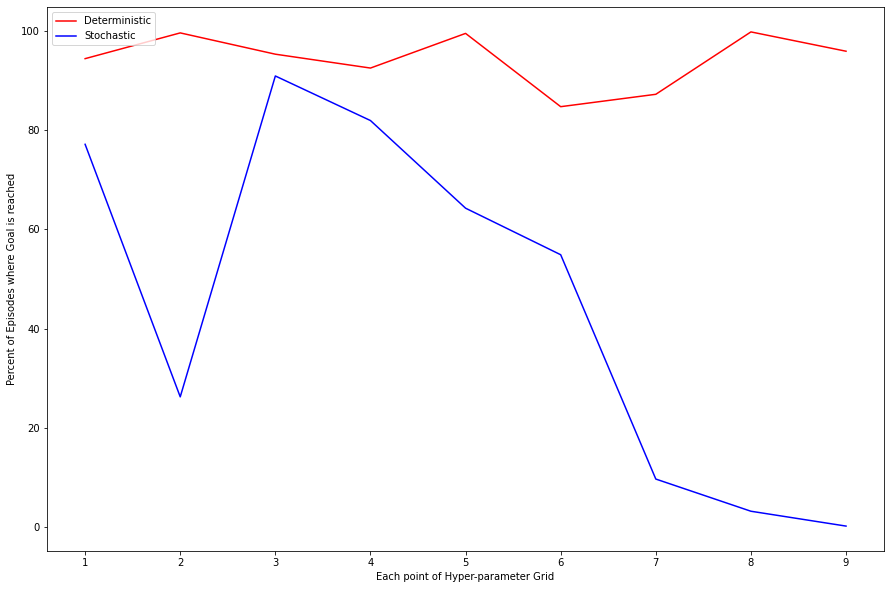

In [ ]:
# Percent of Episodes where Goal is reached
figure(figsize=(15, 10))
plot(list(range(1, len(percent_episodes_goal_reached_q_det)+1)), percent_episodes_goal_reached_q_det, color='r', label='Deterministic')
plot(list(range(1, len(percent_episodes_goal_reached_q_stoc)+1)), percent_episodes_goal_reached_q_stoc, color='b', label='Stochastic')
xlabel('Each point of Hyper-parameter Grid')
ylabel('Percent of Episodes where Goal is reached')
legend(loc='upper left')
savefig('goal_reached.png')